In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("User_Data.csv")

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Data Preprocessing

In [9]:
df=df.drop('User ID',axis=1)

In [10]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le= LabelEncoder()

In [14]:
col=['Gender']
for i in col:
    df[i]=le.fit_transform(df[i])

In [15]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [16]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Text(0.5, 1.0, 'Salary Dataset')

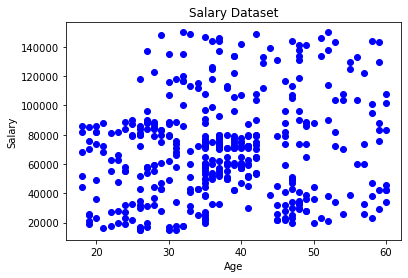

In [21]:
plt.scatter(df.Age,df.EstimatedSalary,color='blue')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title("Salary Dataset")

In [23]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [24]:
X=df[['Gender', 'Age', 'EstimatedSalary']]

In [26]:
X[0:5]

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [27]:
y=df['Purchased']

# Model training

In [22]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [29]:
print("The shape of training data is ",X_train.shape)
print("The shape of testing data is ",X_test.shape)

The shape of training data is  (320, 3)
The shape of testing data is  (80, 3)


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
tr=DecisionTreeClassifier(criterion='entropy')

In [32]:
tr.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [33]:
y_pred=tr.predict(X_test)

In [37]:
y_pred[0:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [38]:
y_test[0:10]

117    0
79     0
382    1
58     0
174    0
236    0
10     0
19     1
171    0
156    0
Name: Purchased, dtype: int64

In [39]:
from sklearn import metrics

In [40]:
print("The accuracy of the model is ",metrics.accuracy_score(y_pred,y_test))

The accuracy of the model is  0.85


In [42]:
from sklearn import tree

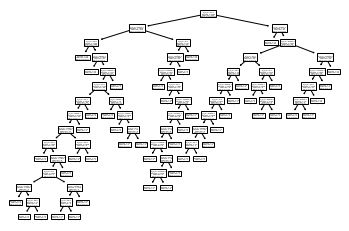

In [43]:
tree.plot_tree(tr)
plt.show()

In [44]:
from sklearn.linear_model import LogisticRegression

In [57]:
lo=LogisticRegression()

In [58]:
lo.fit(X_train,y_train)

LogisticRegression()

In [59]:
y_hat=lo.predict(X_test)

In [62]:
y_hat[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
y_test[0:20]

117    0
79     0
382    1
58     0
174    0
236    0
10     0
19     1
171    0
156    0
74     0
244    0
284    0
49     0
214    0
340    1
78     0
40     0
47     0
209    0
Name: Purchased, dtype: int64

In [63]:
print("The accuracy of the model is ",metrics.accuracy_score(y_hat,y_test))

The accuracy of the model is  0.7375
